# Neural networks with PyTorch

.

                                                Introduction
                                            
Dans le cadre de ce travail dirigé, nous avons exploré les fondements du Deep Learning en utilisant PyTorch, une bibliothèque populaire de machine learning en Python. L'objectif principal était de comprendre les principes de base de la création et de l'entraînement de réseaux de neurones avec PyTorch.

                                                Importation des Packages et Préparation des Données
                                                
Nous avons débuté en important les packages nécessaires, notamment NumPy, Matplotlib, et bien sûr, PyTorch. En outre, nous avons utilisé le module torchvision pour charger et préparer le jeu de données MNIST, qui comprend des images de chiffres manuscrits.

In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # import numpy 
import torch 



import matplotlib.pyplot as plt # used for plotting in python

import helper1
# a warapper built for visualisation purposes

                                                Chargement des Données
                                                    
Nous avons téléchargé et chargé les données MNIST en utilisant le module torchvision.datasets. Les images ont été normalisées et divisées en ensembles d'entraînement et de test.

In [2]:
from torchvision import datasets,transforms
### Data loading 

from torchvision import datasets, transforms 

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),

                               ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False) # batch size is 64 for training

                                                Construction d'un Réseau de Neurones avec PyTorch
                                                
Nous avons créé un réseau de neurones simple en utilisant des opérations matricielles. La première version du réseau a été construite à partir de poids et de biais aléatoires, et nous avons utilisé la fonction d'activation sigmoid pour la couche cachée.

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


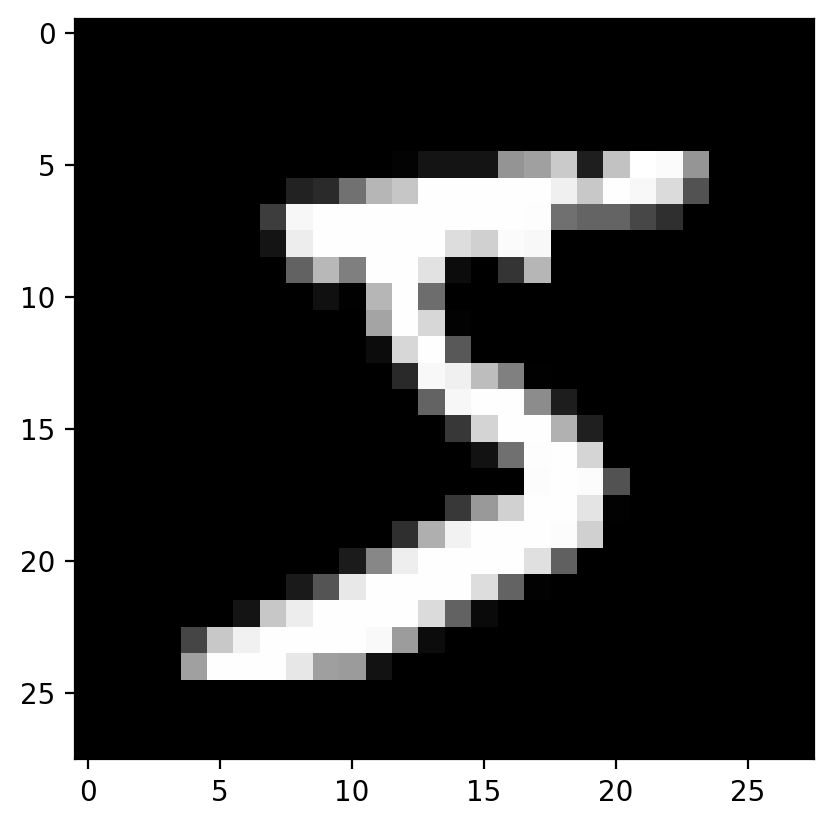

In [10]:
dataiter = iter(trainloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');


## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images (Applatir les images, les faire passer de la forme (64, 1, 28, 28) à la forme (64, 784))
inputs = images.view(images.shape[0], -1)

# Create parameters (ici, les matrices de poids (wi) connectent les Unités d'entrée aux unités cachées)
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

# Forward pass (Propagation avant)
h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2



In [11]:
print(out)

tensor([[ 3.4648e+00,  1.2432e+01,  4.2543e+00,  1.9429e+00,  8.5578e+00,
          9.8042e+00, -9.7268e+00, -1.8840e+01, -1.0600e+01, -3.1199e+00],
        [ 2.6021e+00,  7.4712e+00, -7.7906e-01, -6.7777e-01,  8.2072e+00,
          1.2493e+01, -1.0299e+01, -2.1452e+01, -3.6252e+00, -8.9928e+00],
        [ 1.2817e+00,  2.4254e+01,  1.6134e+00, -6.5606e-02,  6.1128e+00,
          1.8488e+01, -1.9240e+01, -1.8917e+01, -6.9827e+00, -2.2401e+00],
        [ 8.1720e+00,  1.0669e+01,  2.7332e+00, -9.1151e+00,  1.4822e+01,
          1.3165e+01, -1.8505e+01, -1.2139e+01,  5.6281e+00, -1.0117e+01],
        [ 9.1052e+00,  9.4868e+00, -6.8175e+00, -6.1806e+00,  5.1608e+00,
          1.3477e+01, -1.5906e+01, -1.9074e+01, -3.9473e+00, -6.6009e+00],
        [-8.5449e-01,  2.9518e+00, -1.0935e+01,  1.1426e+00,  1.5219e+01,
          1.9873e+01, -5.5006e+00, -1.9947e+01, -3.9116e+00, -8.8409e+00],
        [ 1.4700e+01,  2.3024e+01, -2.8496e+00, -7.3482e-02,  2.5594e+00,
          1.8966e+01, -1.9295e+0

                                                Exercice:
Dans cette partie, nous abordons la transformation des sorties brutes d'un réseau de neurones en une distribution de probabilité utilisant la fonction softmax. Cette distribution de probabilité attribue des probabilités normalisées à chaque classe, permettant d'interpréter les prédictions du réseau. L'exercice consiste à mettre en œuvre la fonction softmax en PyTorch, en veillant à maintenir la forme des tenseurs pendant les opérations, et à vérifier que la distribution résultante a la forme correcte (64, 10) et que les probabilités sont normalisées (la somme est égale à 1).

In [14]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1) # view(-1,1) will give the reshaped matrix with 
                                                                   #1 column and default rows**

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


                                                Utilisation du Module nn de PyTorch
                                                
Nous avons ensuite exploré l'utilisation du module nn de PyTorch pour simplifier la création de réseaux de neurones. Cela a été illustré en construisant un réseau pour la classification d'images MNIST avec une architecture plus complexe.

In [13]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):# this is where the data flows in the network, respecting 
                         #sequence of layers in forward method is very important.
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

Dans cette section, nous avons exploré la création d'un réseau de neurones en utilisant la classe nn.Module de PyTorch. En héritant de cette classe, nous avons créé une architecture de réseau qui suit les bonnes pratiques et offre des méthodes et des attributs utiles. La classe Network que nous avons définie comporte plusieurs couches, notamment une couche cachée (self.hidden) avec une transformation linéaire de 784 entrées à 256 sorties, une couche de sortie (self.output) avec une transformation linéaire de 256 entrées à 10 sorties, et des opérations pour l'activation sigmoid (self.sigmoid) et le softmax (self.softmax).

La méthode forward est essentielle dans les réseaux PyTorch et elle a été définie pour passer l'entrée à travers les différentes couches du réseau dans l'ordre spécifié. Le modèle est ensuite instancié en créant un objet Network. L'utilisation de la classe nn.Module garantit la traçabilité de l'architecture du réseau et fournit un moyen pratique de définir et organiser les différentes couches et opérations.

In [15]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

                                                Utilisation du Module nn de PyTorch
                                                
Nous avons ensuite exploré l'utilisation du module nn de PyTorch pour simplifier la création de réseaux de neurones. Cela a été illustré en construisant un réseau pour la classification d'images MNIST avec une architecture plus complexe.

In [17]:
## Solution
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define hidden layers with ReLU activation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        
        # Define output layer with softmax activation
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Pass input through hidden layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Pass input through output layer with softmax activation
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

model = Network()
model


Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

                                                Visualisation des Poids du Réseau de Neurones : Analyse des Modèles Appris
                                                
Dans cette partie, nous avons exploré la visualisation des poids d'un réseau de neurones à l'aide de la bibliothèque Matplotlib. Après avoir créé une instance du réseau, nous avons accédé aux tenseurs de poids de chaque couche (Fully Connected 1, Fully Connected 2 et Output Layer). Une fonction a été définie pour afficher ces poids sous forme de grilles d'images.

La méthode `plot_weights` a permis de générer des sous-plots pour chaque poids de la couche, les organisant dans une disposition de grille. Les poids ont été affichés en utilisant la fonction `imshow` de Matplotlib, transformant les tenseurs en tableaux NumPy pour visualiser les motifs appris par le réseau.

Cette visualisation des poids offre des informations sur la façon dont le réseau apprend à représenter certaines caractéristiques des données en ajustant les poids de ses connexions. Cette analyse visuelle peut être utile pour interpréter le comportement du réseau pendant l'entraînement et pour diagnostiquer d'éventuels problèmes d'apprentissage.

RuntimeError: shape '[28, 28]' is invalid for input of size 128

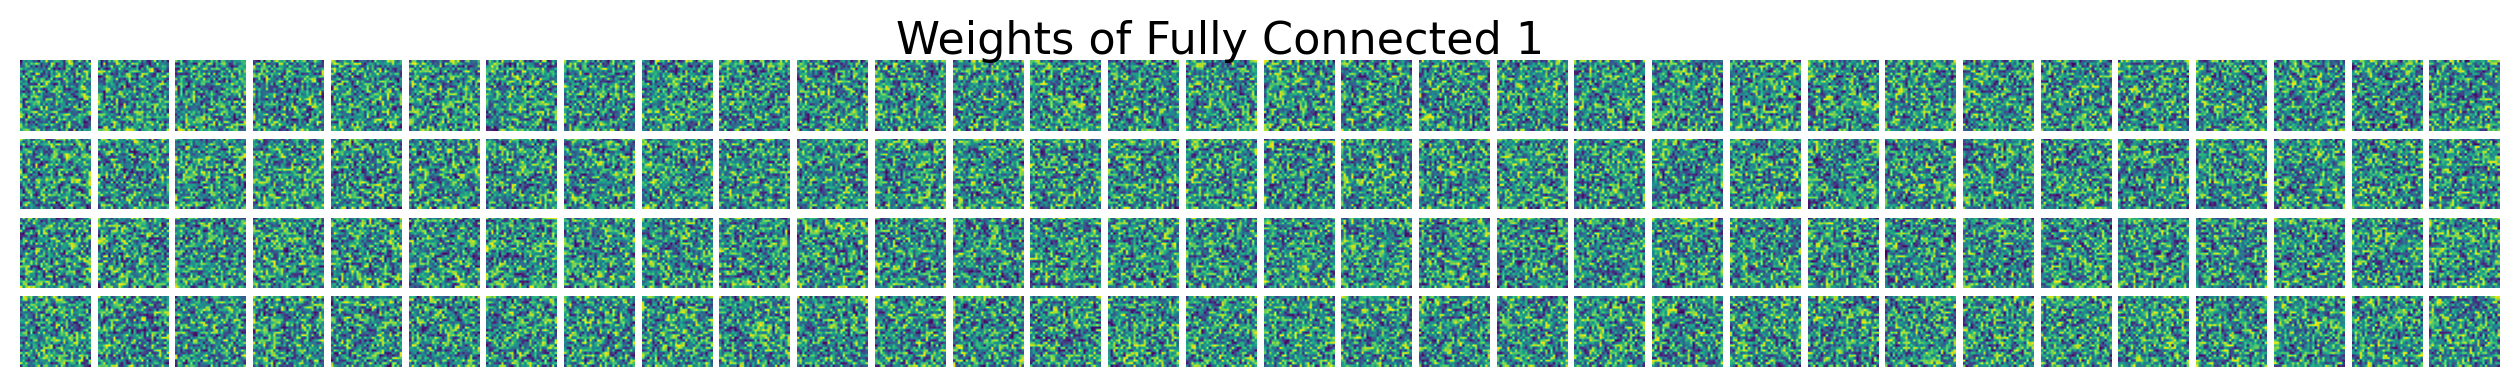

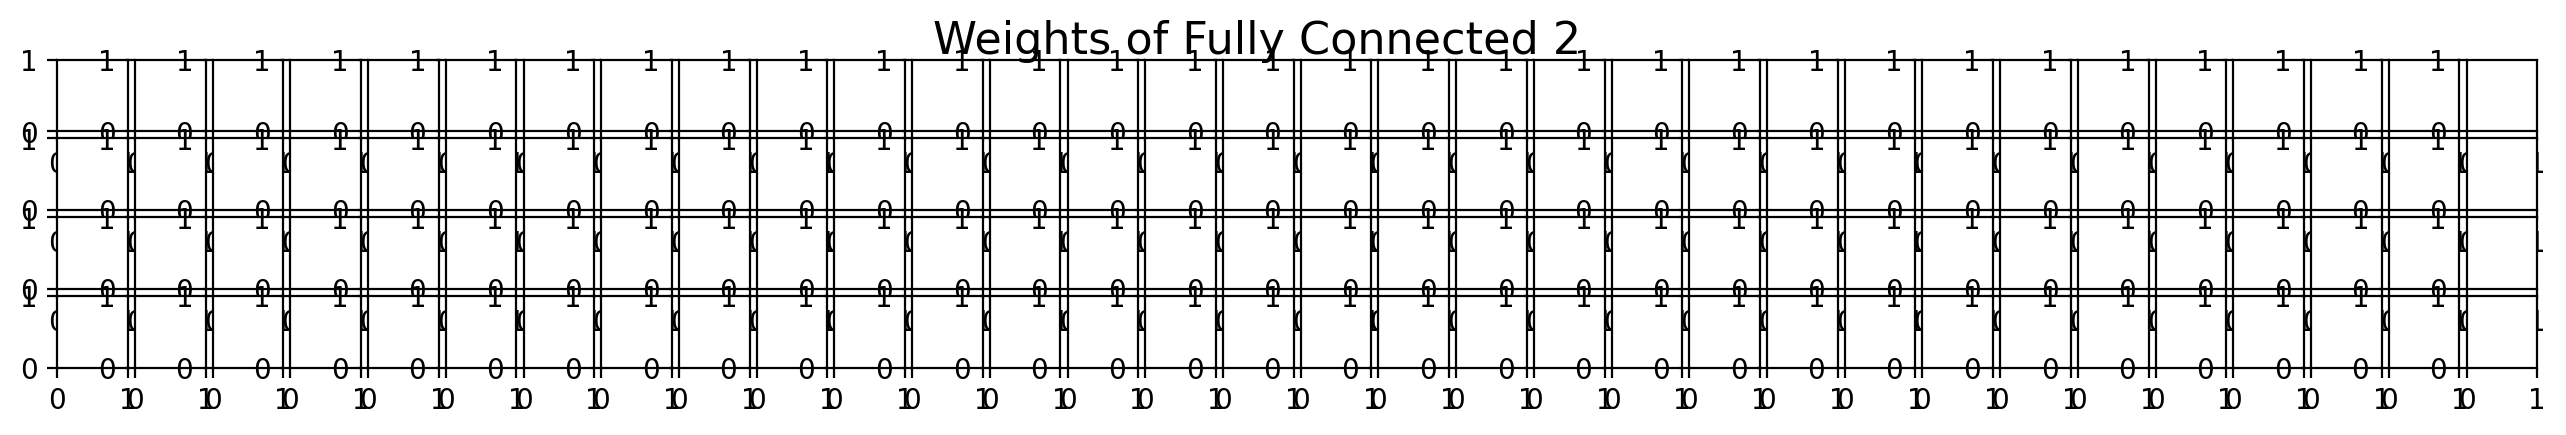

In [18]:
# visalize the weights
import matplotlib.pyplot as plt
import numpy as np

# Create an instance of your network
model = Network()

# Access the weight tensors of each layer
weights_fc1 = model.fc1.weight.data
weights_fc2 = model.fc2.weight.data
weights_fc3 = model.fc3.weight.data

# Function to plot the weights of a layer
def plot_weights(layer_weights, layer_name):
    fig, axes = plt.subplots(nrows=4, ncols=32, figsize=(16, 2))
    fig.suptitle(f'Weights of {layer_name}', fontsize=16)
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(layer_weights[i].view(28, 28).cpu().numpy(), cmap='viridis')
        ax.axis('off')

# Plot the weights of each layer
plot_weights(weights_fc1, 'Fully Connected 1')
plot_weights(weights_fc2, 'Fully Connected 2')
plot_weights(weights_fc3, 'Output Layer')

plt.show()


                                                Forward pass

Dans cette section, nous avons exploré le processus de propagation avant à travers le réseau de neurones. Nous avons utilisé un lot d'images du jeu de données d'entraînement pour effectuer une prédiction avec notre modèle. Après avoir redimensionné les images et effectué la propagation avant, nous avons visualisé la prédiction en affichant l'image originale à côté des probabilités prédites pour chaque classe. Cette étape est cruciale pour comprendre comment le réseau interprète les images et attribue des probabilités aux différentes classes. Elle permet également de détecter tout comportement inattendu ou des problèmes potentiels dans les prédictions du modèle.

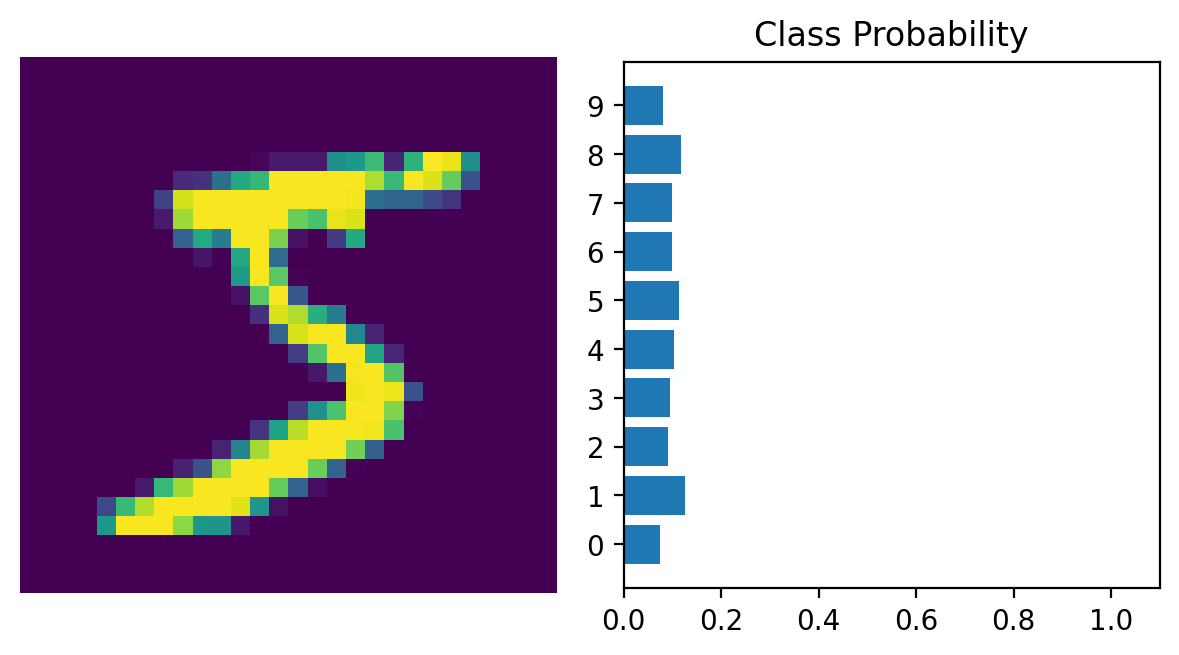

In [19]:
# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Utilisez la fonction next() pour obtenir un batch de données

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images = images.view(images.shape[0], -1)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx].unsqueeze(0))  # Utilisez .unsqueeze(0) pour obtenir une dimension batch de 1

# Visualize the prediction
img = images[img_idx].view(1, 28, 28)
helper1.view_classify(img, ps)


                                                Utilisation de nn.Sequential dans PyTorch

Dans cette section, nous avons exploré une approche alternative pour construire des réseaux de neurones profonds en utilisant la fonction nn.Sequential de PyTorch. Cette méthode offre une manière pratique de créer des réseaux où un tenseur est passé de manière séquentielle à travers différentes opérations.

Nous avons défini les hyperparamètres du réseau, spécifiant la taille de l'entrée, les tailles des couches cachées, et la taille de la sortie. En utilisant nn.Sequential, nous avons construit un réseau à propagation avant en spécifiant les couches linéaires, les activations ReLU, et la couche de sortie avec une activation softmax.

En effectuant une propagation avant à travers le réseau avec une image de notre ensemble de données, nous avons constaté que le modèle non entraîné n'était pas capable de reconnaître correctement le chiffre dans l'image, ce qui était attendu car tous les poids étaient initialisés de manière aléatoire.

Cette approche avec nn.Sequential offre une manière concise et claire de définir la structure d'un réseau de neurones en spécifiant simplement les couches et les activations dans l'ordre souhaité.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


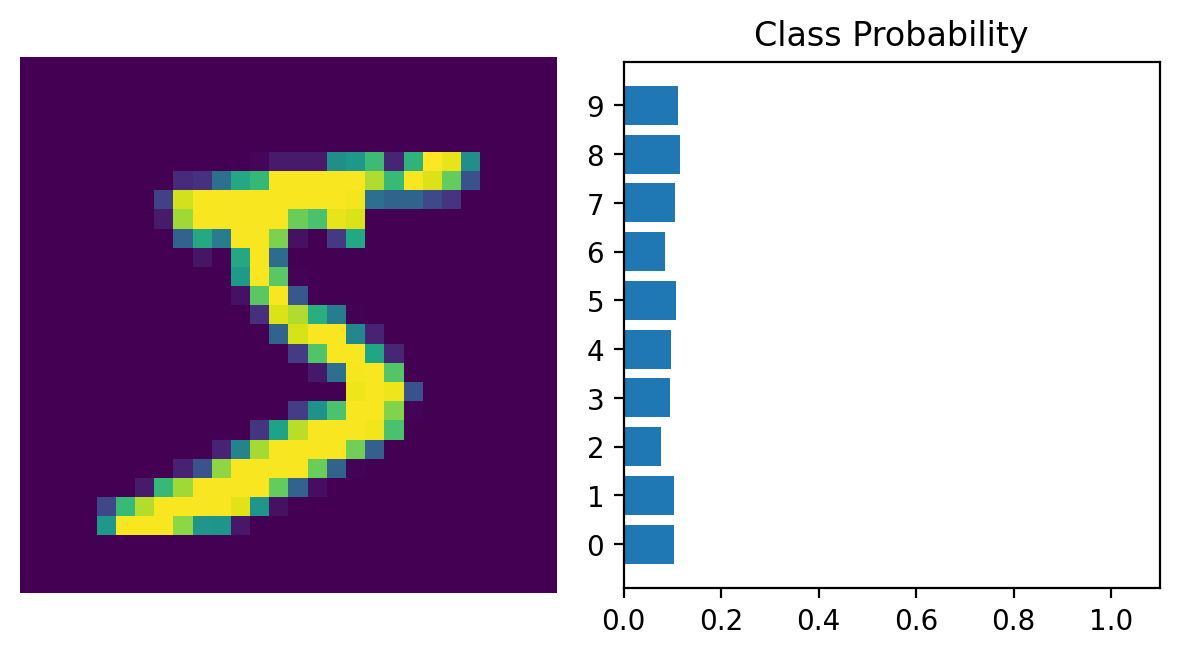

In [20]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0,:])
helper1.view_classify(images[0].view(1, 28, 28), ps)

                                                Accès aux Couches du Réseau
                                                
Nous avons également examiné comment accéder aux couches du réseau, soit par indice soit par leur nom, en fonction de la méthode de construction utilisée.

In [21]:
print(model[0])
# print(model.fc1)
print(model[0].weight)


Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[ 0.0074,  0.0141,  0.0183,  ..., -0.0091,  0.0161,  0.0152],
        [ 0.0300,  0.0300, -0.0309,  ...,  0.0009, -0.0251, -0.0020],
        [ 0.0249, -0.0160, -0.0072,  ...,  0.0269, -0.0146,  0.0127],
        ...,
        [ 0.0171,  0.0007, -0.0331,  ..., -0.0307, -0.0233, -0.0173],
        [ 0.0077,  0.0213,  0.0263,  ..., -0.0300, -0.0283, -0.0027],
        [ 0.0167, -0.0315, -0.0263,  ..., -0.0031, -0.0328,  0.0152]],
       requires_grad=True)
